# **타이타닉 생존자 예측 (초보자)**

### **목차**
1. 필요한 라이브러리 불러오기
2. 데이터 불러오기
3. 데이터 분석
4. 데이터 시각화
5. 데이터 전처리
6. 모델 선택
7. 제출 파일 생성

## **1) 필요한 라이브러리 불러오기**

In [383]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## **2) 데이터 불러오기**

In [384]:
train = pd.read_csv("../input/titanic/train.csv")
test = pd.read_csv("../input/titanic/test.csv")

## **3) 데이터 분석**

In [385]:
print(train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [386]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
431,432,1,3,"Thorneycroft, Mrs. Percival (Florence Kate White)",female,NaN,1,0,376564,16.1000,NaN,S
797,798,1,3,"Osman, Mrs. Mara",female,31.0,0,0,349244,8.6833,NaN,S
570,571,1,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5000,NaN,S
388,389,0,3,"Sadlier, Mr. Matthew",male,NaN,0,0,367655,7.7292,NaN,Q
734,735,0,2,"Troupiansky, Mr. Moses Aaron",male,23.0,0,0,233639,13.0000,NaN,S


In [387]:
train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### ⭐**특성분류**
1. **수치형 데이터**: Age(연속형), Fare(연속형), SibSp(이산형), Parch(이산형)
2. **범주형 데이터**: Survived, Pclass, Sex, Embarked
3. **문자형 데이터**: Ticket, Cabin
4. **삭제** : ~~PassengerId, Name~~


* Pclass	객실 등급 (1 = 1등석, 2 = 2등석, 3 = 3등석)
* SibSp	함께 탑승한 형제자매/배우자 수
* Parch	함께 탑승한 부모/자녀 수
* Ticket 티켓 번호
* Cabin	선실 번호
* Embarked	탑승한 항구


### **🔎관찰결과**
1. 891명의 승객이 있음
2. Age : 714 -> 중요한 특성일 수 있으므로 결측치 채워주는 게 좋음
3. Cabin : 204 -> 결측치가 너무 많아서 제거
4. Embarked : 889 -> 이정도 결측치는 ㄱㅊ

### 🤔 **예측 가설**
1. `sex` : 여성이 생존할 가능성 ↑?
2. `SibSp`/`Parch` : 혼자 여행한 사람이 생존할 가능성 ↑?
3. `Age` : 어릴수록 생존할 가능성 ↑?
4. `Pclass` : 객실등급이 높을수록 생존할 가능성↑?

## **4) 데이터 시각화**
예측가설이 맞는지 시각화해보자!

### 1. `Sex` : 여성이 생존할 가능성 ↑?

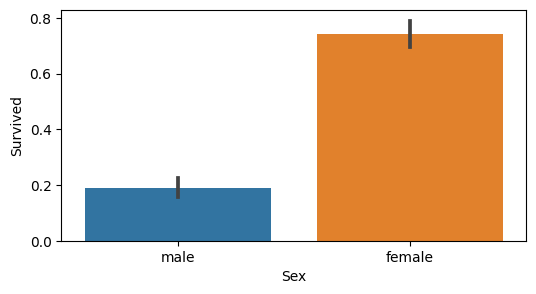

여성 생존율 : 74.2 %
남성 생존율 : 18.9 %


In [388]:
plt.figure(figsize=(6,3))
sns.barplot(data=train, x='Sex', y='Survived')
plt.show()

temp = train.groupby('Sex')['Survived'].mean()*100
print('여성 생존율 :',round(temp['female'],1),'%')
print('남성 생존율 :',round(temp['male'],1), '%')

### 2. `SibSp/Parch` : 혼자 여행한 사람이 생존할 가능성 ↑?

In [389]:
round(train.groupby('SibSp')['Survived'].mean()*100,1)

SibSp
0    34.5
1    53.6
2    46.4
3    25.0
4    16.7
5     0.0
8     0.0
Name: Survived, dtype: float64

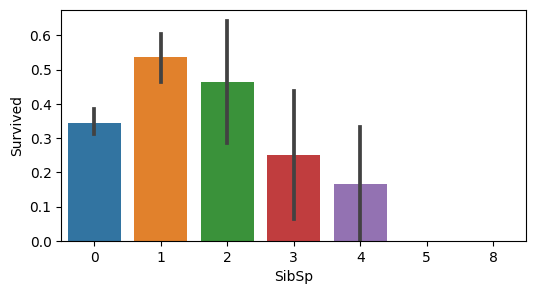

In [390]:
plt.figure(figsize=(6,3))
sns.barplot(data=train, x='SibSp', y='Survived')
plt.show()

### 3. `Age` : 어릴수록 생존할 가능성 ↑?

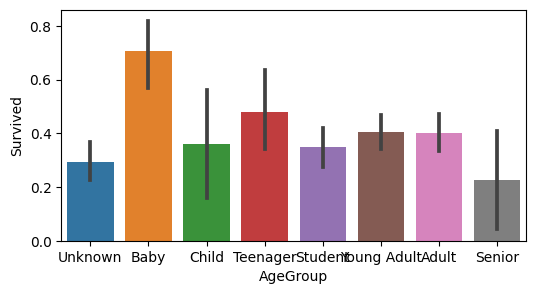

In [391]:
train['Age'] = train['Age'].fillna(-0.5)
test['Age'] = train['Age'].fillna(-0.5)

bins = [-1,0,5,12,17,24,35,60,np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']

train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels)
test['AgeGroup'] = pd.cut(test['Age'], bins=bins, labels=labels)

plt.figure(figsize=(6,3))
sns.barplot(data=train, x='AgeGroup', y='Survived')
plt.show()

### 4. `Pclass` : 객실등급이 높을수록 생존할 가능성↑?

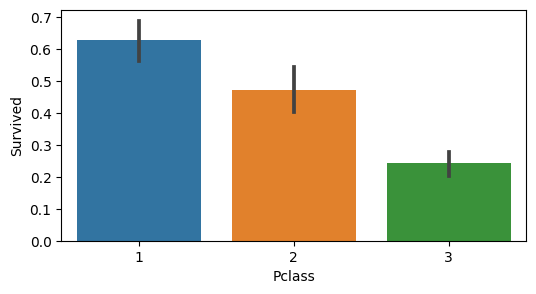

In [392]:
plt.figure(figsize=(6,3))
sns.barplot(data=train, x='Pclass', y='Survived')
plt.show()

In [393]:
train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))

## **5) 데이터 전처리**

In [394]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8,NaN
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Young Adult,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,100,NaN
mean,1100.500000,2.265550,NaN,NaN,22.885766,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,17.210527,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,4.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,34.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN,0.000000


- 총 418개 데이터
- Fare 값 한개 누락
- Age는 332개

### `Cabin`, `Ticket` 특성 삭제

In [395]:
train = train.drop(['Cabin', 'Ticket'], axis=1)
test = test.drop(['Cabin', 'Ticket'], axis=1)

### `Embarked` 특성 결측치 처리

In [396]:
train["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [397]:
train['Embarked']=train['Embarked'].fillna('S')
train['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

- S에서 탑승한 사람이 가장 많음 -> 결측치 S로 채움

### `Age` 특성 결측치 처리

`Age`의 결측치는 많기 때문에, 하나의 값으로 채우기보다 논리적인 방법으로 예측하여 채워야 한다.
누락된 나이를 예측하는 방법 사용

1. **이름에서 호칭 추출하기**

In [398]:
combine = [train, test]

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


2. **다양한 호칭을 공통 이름으로 통합하기**

In [399]:
#희귀한 호칭들을 'Rare'로 통합
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')

#귀족 계층에 해당하는 호칭을 'Royal'로 통합
dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')

#다양한 호칭 통합 정리
dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

#호칭별 평균 생존률 확인
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Countess,1.000000
1,Master,0.575000
2,Miss,0.697802
3,Mlle,1.000000
4,Mme,1.000000
5,Mr,0.156673
6,Mrs,0.792000
7,Ms,1.000000
8,Rare,0.285714
9,Sir,1.000000


3. **호칭을 숫자로 매핑**

In [400]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

4. **호칭에 따라 결측된 AgeGroup 예측하여 채우기**

In [401]:
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult

In [402]:
age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]
        
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

In [403]:
#AgeGroup 숫자로 매핑하기
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}

train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

#Age 열 삭제
train = train.drop(['Age'], axis=1)
test = test.drop(['Age'], axis=1)

### `Name` 특성 삭제

In [404]:
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

### `Sex` 특성 숫자변환

In [405]:
sex_mapping ={"male" : 0, "female":1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

### `Embarked` 특성 숫자변환

In [406]:
embarked_mapping = {'S':1, 'C':2, 'Q':3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,1,4.0,0,1.0
1,2,1,1,1,1,0,71.2833,2,6.0,1,3.0
2,3,1,3,1,0,0,7.9250,1,5.0,0,2.0
3,4,1,1,1,1,0,53.1000,1,5.0,1,3.0
4,5,0,3,0,0,0,8.0500,1,5.0,0,1.0


### `Fare` 특성 결측치 처리

In [407]:
test['Fare']=test['Fare'].fillna(0)

train['FareBand'] = pd.qcut(train['Fare'],4,labels=[1,2,3,4])
test['FareBand'] = pd.qcut(test['Fare'],4,labels=[1,2,3,4])

train = train.drop(['Fare'],axis=1)
test = test.drop(['Fare'],axis=1)

In [408]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,0,1,0,1,4.0,0,1.0,1
1,2,1,1,1,1,0,2,6.0,1,3.0,4
2,3,1,3,1,0,0,1,5.0,0,2.0,2
3,4,1,1,1,1,0,1,5.0,1,3.0,4
4,5,0,3,0,0,0,1,5.0,0,1.0,2


In [409]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,892,3,0,0,0,3,4.0,0,1,1
1,893,3,1,1,0,1,6.0,0,3,1
2,894,2,0,0,0,3,5.0,0,1,2
3,895,3,0,0,0,1,5.0,0,1,2
4,896,3,1,1,1,1,5.0,0,3,2


## **6) 모델 선택**


In [410]:
from sklearn.model_selection import train_test_split

X = train.drop(['PassengerId', 'Survived'], axis=1)
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.22, random_state=0)
#22% 검증, 78% 훈련

**테스트 해볼 모델**

- Gaussian 나이브 베이즈
- 로지스틱 회귀
- 서포트 벡터 머신 (SVM)
- 퍼셉트론
- 결정 트리 (Decision Tree)
- 랜덤 포레스트 (Random Forest)
- KNN (k-최근접 이웃)
- 확률적 경사 하강법 (SGD)
- 그래디언트 부스팅 (Gradient Boosting)


In [411]:
#가우시안 나이브 베이즈 (-> 조건부 확률을 이용한 간단하고 빠른 분류기)
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(X_train,y_train)
y_pred = gaussian.predict(X_test)
round(accuracy_score(y_pred, y_test)*100, 2)

78.68

In [412]:
#로지스틱 회귀
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
round(accuracy_score(y_pred,y_test)*100,2)

80.2

In [413]:
#SVM 서포트 벡터 머신
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
round(accuracy_score(y_pred, y_test)*100, 2)

83.25

In [414]:
#Linear SVC 선형 서포트 벡터 머신
from sklearn.svm import LinearSVC

linear_scv = LinearSVC()
linear_scv.fit(X_train, y_train)
y_pred = linear_scv.predict(X_test)
round(accuracy_score(y_pred, y_test)*100,2)

79.7

In [428]:
#퍼셉트론
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
round(accuracy_score(y_pred, y_test) *100,2)

76.65

In [416]:
#의사결정 트리
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
y_pred = decisiontree.predict(X_test)
round(accuracy_score(y_pred, y_test)*100,2)

79.19

In [417]:
#랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
round(accuracy_score(y_pred, y_test)*100,2)

84.26

In [418]:
#KNN k-최근접이웃
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
round(accuracy_score(y_pred, y_test)*100,2)

82.74

In [419]:
#SGD 확률적 경사 하강법 
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
round(accuracy_score(y_pred, y_test)*100, 2)

39.59

In [420]:
#그래디언트 부스팅 분류기
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
y_pred = gbk.predict(X_test)
round(accuracy_score(y_pred, y_test)*100,2)

85.28

In [421]:
X_test

,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
495,3,0,0,0,2,5.0,0,1.0,3
648,3,0,0,0,1,5.0,0,1.0,1
278,3,0,4,1,3,2.0,0,4.0,3
31,1,1,1,0,2,6.0,1,3.0,4
255,3,1,0,2,2,5.0,0,3.0,3
...,...,...,...,...,...,...,...,...,...
875,3,1,0,0,2,3.0,0,2.0,1
727,3,1,0,0,3,4.0,0,2.0,1
428,3,0,0,0,3,5.0,0,1.0,1
54,1,0,0,1,2,7.0,1,1.0,4


In [422]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
SibSp          0
Parch          0
Embarked       0
AgeGroup       0
CabinBool      0
Title          0
FareBand       0
dtype: int64

In [423]:
test.drop('PassengerId', axis=1)

,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,3,0,0,0,3,4.0,0,1,1
1,3,1,1,0,1,6.0,0,3,1
2,2,0,0,0,3,5.0,0,1,2
3,3,0,0,0,1,5.0,0,1,2
4,3,1,1,1,1,5.0,0,3,2
...,...,...,...,...,...,...,...,...,...
413,3,0,0,0,1,5.0,0,1,2
414,1,1,0,0,2,6.0,1,6,4
415,3,0,0,0,1,5.0,0,1,1
416,3,0,0,0,1,5.0,0,1,2


## **7) 제출 파일 생성**

In [424]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
SibSp          0
Parch          0
Embarked       0
AgeGroup       0
CabinBool      0
Title          0
FareBand       0
dtype: int64

In [427]:
#그래디언트 부스팅 분류기 모델로 테스트데이터를 통째로 예측
ids = test['PassengerId']
predictions = gbk.predict(test.drop('PassengerId', axis=1))

output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions})
output.to_csv('submission.csv', index=False)

[참고 노트북](https://www.kaggle.com/code/nadintamer/titanic-survival-predictions-beginner)